In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
def read_images(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            image_array = np.array(image)
            image_list.append(image_array)
    return np.array(image_list)

# Example usage
directory_path = './data/'  # Replace with the path to your directory
image_list = read_images(directory_path)
print(image_list)
# Print the list of image files
# for image_file in image_list:
#     print(image_file)

[[[[254 255 246]
   [239 242 231]
   [251 254 247]
   ...
   [255 255 255]
   [243 243 243]
   [255 255 255]]

  [[226 229 220]
   [ 36  39  30]
   [  0   2   0]
   ...
   [  2   2   2]
   [ 38  38  38]
   [225 225 225]]

  [[254 255 250]
   [  0   2   0]
   [  0   1   0]
   ...
   [  0   0   2]
   [  0   0   0]
   [255 255 255]]

  ...

  [[255 253 255]
   [  3   0   4]
   [  3   0   4]
   ...
   [  3   0   4]
   [  3   0   4]
   [255 253 255]]

  [[255 253 255]
   [  3   0   4]
   [  3   0   4]
   ...
   [  7   2   8]
   [  5   0   6]
   [255 253 255]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 254 255]
   [255 254 255]
   [255 254 255]]]


 [[[255 254 255]
   [225 223 226]
   [255 254 255]
   ...
   [243 245 240]
   [243 246 239]
   [254 255 250]]

  [[230 228 231]
   [ 36  34  37]
   [  7   5   8]
   ...
   [  4   6   1]
   [ 32  34  29]
   [230 233 226]]

  [[255 254 255]
   [  1   0   2]
   [  1   0   2]
   ...
   [  0   1   0]
   [  0   1   0]
   [254 255

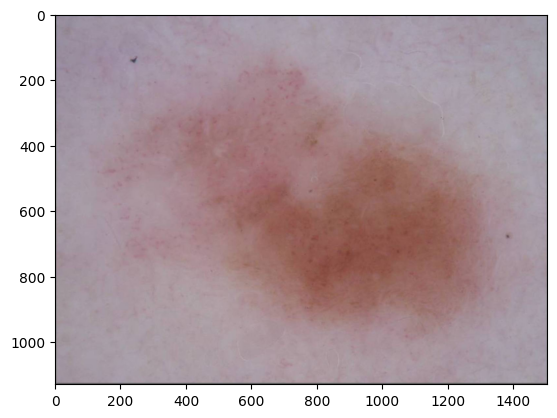

In [3]:
plt.imshow(image_list[0])

(512, 512, 3)
[[0.13419498 0.15000425 0.92039459]
 [0.44872687 0.10829097 0.82269622]
 [0.78633647 0.91091072 0.33086004]]


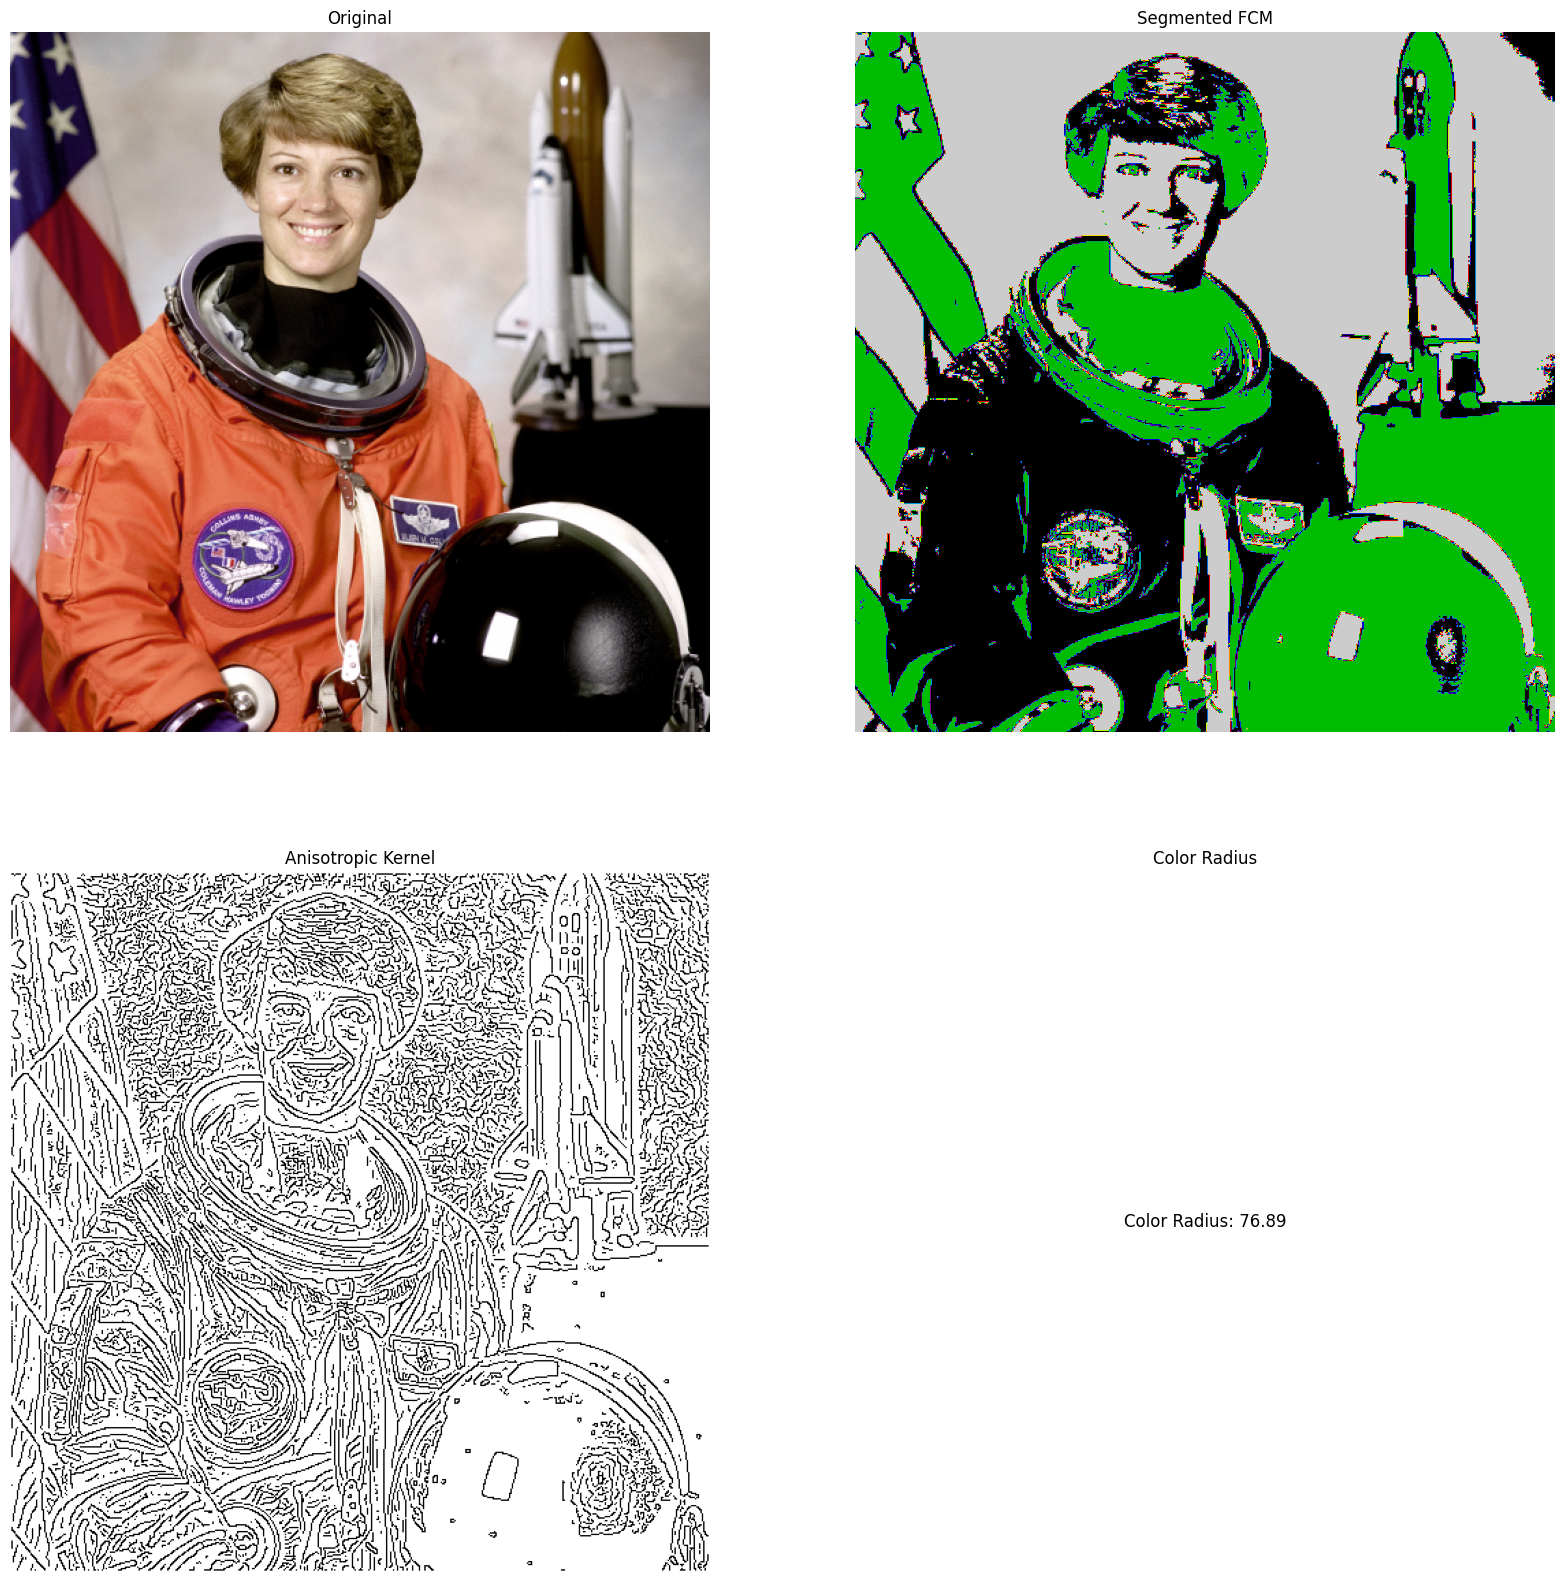

NameError: name 'mean_shift_vector' is not defined

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color,feature
from skimage.color import rgb2gray

from sklearn.cluster import MeanShift,estimate_bandwidth
# from skimage.segmentation import mean_shift
def fcm_clustering(image, n_clusters, fuzziness, max_iter=100, tol=1e-5):
    image_flat = image.reshape((image.shape[0] * image.shape[1],3))
    n_pixels = image_flat.shape[0]
    n_channels = image.shape[-1]

    # Initialize cluster centers randomly
    cluster_centers = np.random.rand(n_clusters, n_channels)
    print(cluster_centers)
    for _ in range(max_iter):
        # Compute distances from pixels to cluster centers
        distances = np.linalg.norm(image_flat[:, np.newaxis] - cluster_centers, axis=2)

        # Compute membership values or fuzzy partitions
        membership = 1 / (distances ** (2 / (fuzziness - 1)))
        membership = membership / np.sum(membership, axis=1, keepdims=True)

        # Update cluster centers
        cluster_centers_new = np.dot(membership.T, image_flat) / np.sum(membership, axis=0, keepdims=True).T

        # Check convergence
        if np.linalg.norm(cluster_centers_new - cluster_centers) < tol:
            break

        cluster_centers = cluster_centers_new

    # Find the cluster with the highest membership for each pixel
    image_segmented = np.argmax(membership, axis=1)

    # Reshape segmented image back to original shape
    image_segmented = np.reshape(image_segmented, image.shape[:-1])

    return image_segmented

def amfcm_clustering(image, n_clusters, fuzziness, max_iter=100, tol=1e-5):
    image_flat = image.reshape((image.shape[0] * image.shape[1],3))
    n_pixels = image_flat.shape[0]
    n_channels = image.shape[-1]

    # Initialize cluster centers randomly
    cluster_centers = np.random.rand(n_clusters, n_channels)
    print(cluster_centers)
    for _ in range(max_iter):
        # Compute distances from pixels to cluster centers
        distances = np.linalg.norm(image_flat[:, np.newaxis] - cluster_centers, axis=2)

        # Compute membership values or fuzzy partitions
        membership = 1 / (distances ** (2 / (fuzziness - 1)))
        membership = membership / np.sum(membership, axis=1, keepdims=True)

        # Update cluster centers
        cluster_centers_new = np.dot(membership.T, image_flat) / np.sum(membership, axis=0, keepdims=True).T

        # Check convergence
        if np.linalg.norm(cluster_centers_new - cluster_centers) < tol:
            break

        cluster_centers = cluster_centers_new

    # Find the cluster with the highest membership for each pixel
    image_segmented = np.argmax(membership, axis=1)

    # Reshape segmented image back to original shape
    image_segmented = np.reshape(image_segmented, image.shape[:-1])

    return image_segmented

def compute_anisotropic_kernel(image, sigma_s):
    # Convert image to LAB color space
    lab = color.rgb2lab(image)

    # Compute gradient magnitude
    gradient = feature.canny(lab[:, :, 0], sigma=1)

    # Compute anisotropic kernel
    kernel = np.exp(~gradient / (2 * sigma_s ** 2))

    return kernel

def compute_color_radius(image, kernel):
    # Convert image to LAB color space
    lab = color.rgb2lab(image)

    # Compute color distances
    color_distances = np.sqrt(np.sum(lab[:, :, 1:] ** 2, axis=2))

    # Compute color radius
    color_radius = np.max(kernel * color_distances)

    return color_radius

# def calculate_mean_shift_vector(image, spatial_radius, range_radius, min_density):
#     # Load the image
    
    
#     # Convert the image to the Lab color space
#     image_lab = color.rgb2lab(image)
    
#     # Perform mean shift segmentation
#     labels = mean_shift(image_lab, spatial_radius=spatial_radius,
#                                      range_radius=range_radius, min_density=min_density)
    
#     # Calculate the mean shift vector
#     mean_shift_vector = np.mean(labels, axis=(0, 1))
    
#     return mean_shift_vector

def mean_shift_segmentation(image, spatial_radius, range_radius, min_density):
    # Reshape the image to a flattened array of RGB values
    gray = rgb2gray(image)
    flattened_image = image.reshape(-1, 3)
#     bandwidth = estimate_bandwidth(gray)
    # Perform mean shift clustering
    ms = MeanShift(bandwidth=spatial_radius)
    ms.fit(flattened_image)
    
    # Retrieve the labels and cluster centers
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    # Reshape the labels back to the image shape
    segmented_image = labels.reshape(image.shape[:2])
    
    return segmented_image, cluster_centers


# Load image
image = data.astronaut()
# print("IMAGE diemnsions:::",image.shape)
image_rgb = color.rgb2lab(image)
# print("RGB dimensions::",image_rgb.shape)
# Perform Fuzzy C-Means clustering
n_clusters = 3
fuzziness = 2
print(image_rgb.shape)
# anisotropic kernel
sigma_s = 16

# Mean shift vectors
spatial_radius = 5  # Spatial radius for mean shift
range_radius = 15  # Range radius for mean shift
min_density = 20  # Minimum density for mean shift


segmented_image = fcm_clustering(image, n_clusters, fuzziness)
kernel = compute_anisotropic_kernel(image, sigma_s)

# Compute color radius
color_radius = compute_color_radius(image, kernel)

# Perform mean shift segmentation
# segmented_image, cluster_centers = mean_shift_segmentation(segmented_image, spatial_radius=color_radius, range_radius=6, min_density=20)

# Plot original and segmented images
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0,0].imshow(image)
axes[0,0].set_title('Original')
axes[0,0].axis('off')
axes[0,1].imshow(segmented_image, cmap='nipy_spectral')
axes[0,1].set_title('Segmented FCM')
axes[0,1].axis('off')
mask = np.where(np.all(kernel >=1, axis=-1))
axes[1,0].imshow(kernel[mask], cmap='gray')
axes[1,0].set_title('Anisotropic Kernel')
axes[1,0].axis('off')
axes[1,1].text(0.5, 0.5, f'Color Radius: {color_radius:.2f}', fontsize=12, ha='center', va='center')
axes[1,1].set_title('Color Radius')
axes[1,1].axis('off')
plt.show()
print(mean_shift_vector)

In [ ]:
mask = np.where(np.all(kernel >=1, axis=-1))
plt.imshow(kernel[mask],cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


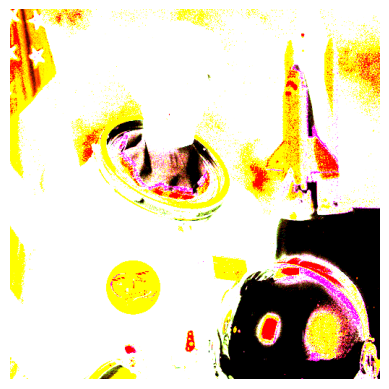

In [18]:
luv_image = color.rgb2luv(image)

# Display the LUV image
plt.imshow(luv_image)
plt.axis('off')
plt.show()

In [22]:
spatial_domain = 2

range_domain = 2

bandwidth_matrix = (spatial_domain**2)*np.identity(5)
print(bandwidth_matrix)

[[4. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 4.]]
